In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

c:\users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.duplicated().sum()

0

In [5]:
#cek nol value

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
missing = df.applymap(lambda x:x == 0)
missing_value = missing.sum()
print('Nol value:\n', missing_value)

Nol value:
 Unnamed: 0                          1
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                   233
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                                0
purpose                             0
title                               0
zip_code                            0
addr_state                          0
dti                               363


In [6]:
#cek NaN

check_nan = df.isna().any().any()
total_nan = df.isna().sum()
with_nan = total_nan[total_nan >0]
print('Column with NaN:\n', with_nan)

Column with NaN:
 emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    4

In [7]:
cols_to_drop = ['Unnamed: 0',
                'id',
                'member_id',
                'emp_title',
                'url','desc',
                'purpose',
                'title',
                'zip_code',
                'delinq_2yrs',
                'inq_last_6mths',
                'mths_since_last_delinq',
                'mths_since_last_record',
                'pub_rec',
                'collections_12_mths_ex_med',
                'annual_inc_joint','dti_joint',
                'verification_status_joint',
                'acc_now_delinq',
                'open_acc_6m',
                'open_il_6m',
                'open_il_12m',
                'open_il_24m',
                'mths_since_rcnt_il',
                'total_bal_il',
                'il_util',
                'open_rv_12m',
                'open_rv_24m',
                'max_bal_bc',
                'all_util',
                'inq_fi',
                'total_cu_tl',
                'inq_last_12m',
                'total_rev_hi_lim',
                'mths_since_last_major_derog',
                'next_pymnt_d',
                'issue_d',
                'recoveries',
                'collection_recovery_fee',
                'tot_coll_amt',
                'tot_cur_bal',
                'last_credit_pull_d',
                'total_rec_late_fee']
df = df.drop(cols_to_drop, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   term                 466285 non-null  object 
 4   int_rate             466285 non-null  float64
 5   installment          466285 non-null  float64
 6   grade                466285 non-null  object 
 7   sub_grade            466285 non-null  object 
 8   emp_length           445277 non-null  object 
 9   home_ownership       466285 non-null  object 
 10  annual_inc           466281 non-null  float64
 11  verification_status  466285 non-null  object 
 12  loan_status          466285 non-null  object 
 13  pymnt_plan           466285 non-null  object 
 14  addr_state           466285 non-null  object 
 15  dti              

In [9]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,11.187069,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,3123.913796,1.0
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,4.987526,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5554.737393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,8.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,312.620000,1.0
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,10.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,545.960000,1.0
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,14.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,3187.510000,1.0
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,84.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,36234.440000,1.0


In [10]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,AZ,27.65,Jan-85,3.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,Jan-15,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,GA,1.00,Apr-99,3.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,IL,8.72,Nov-01,2.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,Jun-14,649.91,1,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,CA,20.00,Feb-96,10.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,Jan-15,357.48,1,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,OR,17.94,Jan-96,15.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,Jan-16,67.79,1,INDIVIDUAL


In [11]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
pymnt_plan                 0
addr_state                 0
dti                        0
earliest_cr_line          29
open_acc                  29
revol_bal                  0
revol_util               340
total_acc                 29
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d             376
last_pymnt_amnt            0
policy_code                0
application_type           0
dtype: int64

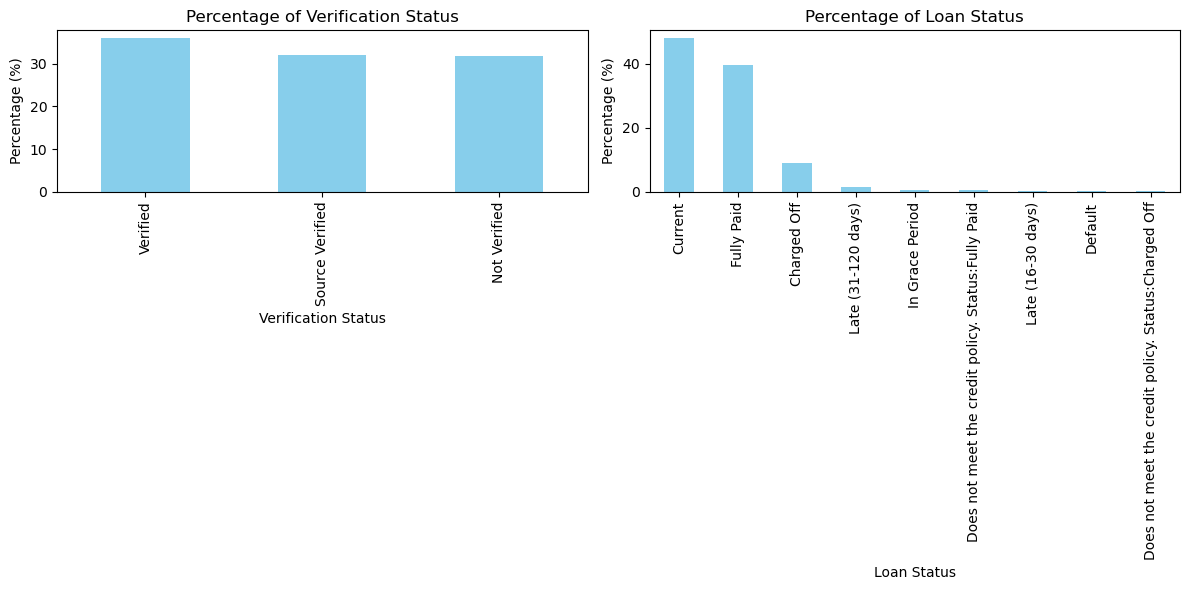

In [13]:
verif_counts = df['verification_status'].value_counts(normalize=True) * 100
loan_counts = df['loan_status'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#verif status visualization
verif_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Percentage of Verification Status')
axes[0].set_xlabel('Verification Status')
axes[0].set_ylabel('Percentage (%)')

#loan status visualization
loan_counts.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Percentage of Loan Status')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

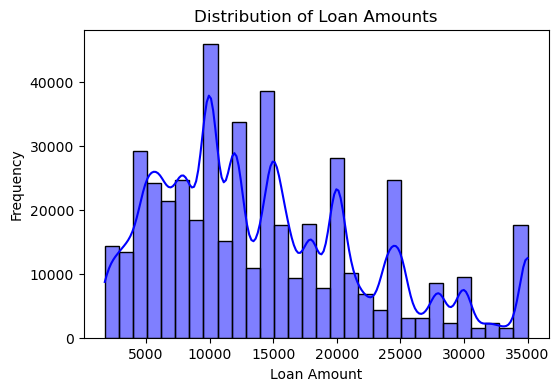

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [14]:
#emp_length

df['emp_length'] = df['emp_length'].str.extract(r'(\d+)') #extract number
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce') #change to numeric

In [15]:
med_emp = df['emp_length'].median()
df['emp_length'].fillna(med_emp, inplace=True)

In [16]:
df.dropna(subset=['earliest_cr_line','last_pymnt_d'], inplace=True)

In [17]:
#handling missing value
med_revol = df['revol_util'].median()
df['revol_util'].fillna(med_revol, inplace=True)

In [18]:
df.drop(columns=['addr_state'], inplace=True)

In [19]:
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
pymnt_plan             0
dti                    0
earliest_cr_line       0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
policy_code            0
application_type       0
dtype: int64

In [20]:
#term

df['term_num'] = df['term'].str.extract(r'(\d+)', expand=False).astype(int) #mengambil angka
df.drop(columns=['term'], inplace=True)

In [21]:
#convert to date time

from datetime import datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['earliest_cr_line_mnth'] = (datetime.now() - df['earliest_cr_line']).dt.days // 30

df.drop(['last_pymnt_d','earliest_cr_line'], axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

le_grade = LabelEncoder() #for grade
df['grade'] = le_grade.fit_transform(df['grade'])

le_sub_grade = LabelEncoder()
df['sub_grade'] = le_sub_grade.fit_transform(df['sub_grade'])

In [23]:
df =  pd.get_dummies(df, columns=['home_ownership', 'pymnt_plan','initial_list_status','application_type','verification_status'], dtype=int)

In [24]:
# loan status

label_map = {  #change to bad and good
    'Fully Paid':'Good',
    'Charged Off':'Bad',
    'Current':'Good',
    'Default':'Bad',
    'Late (31-120 days)':'Bad',
    'In Grace Period':'Good',
    'Late (16-30 days)':'Bad',
    'Does not meet the credit policy. Status:Fully Paid':'Bad',
    'Does not meet the credit policy. Status:Charged Off':'Bad'
}
#map the loan
df['loan_status'] = df['loan_status'].map(label_map)

df['loan_status'] = df['loan_status'].map({
    'Good':1,
    'Bad':0
})

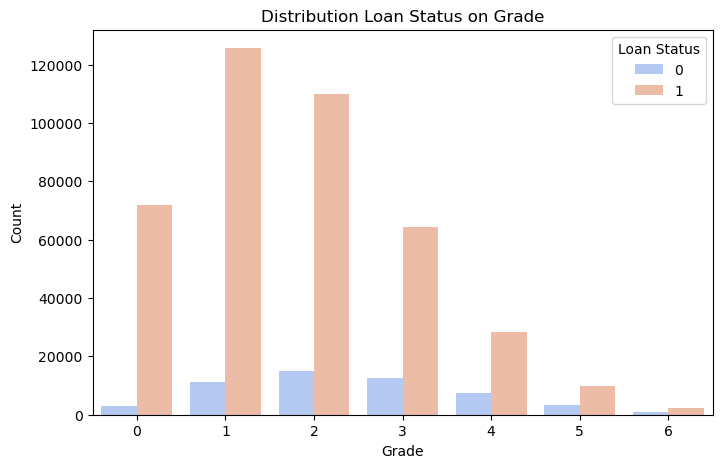

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='grade', hue='loan_status', data=df, palette='coolwarm')
plt.title('Distribution Loan Status on Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

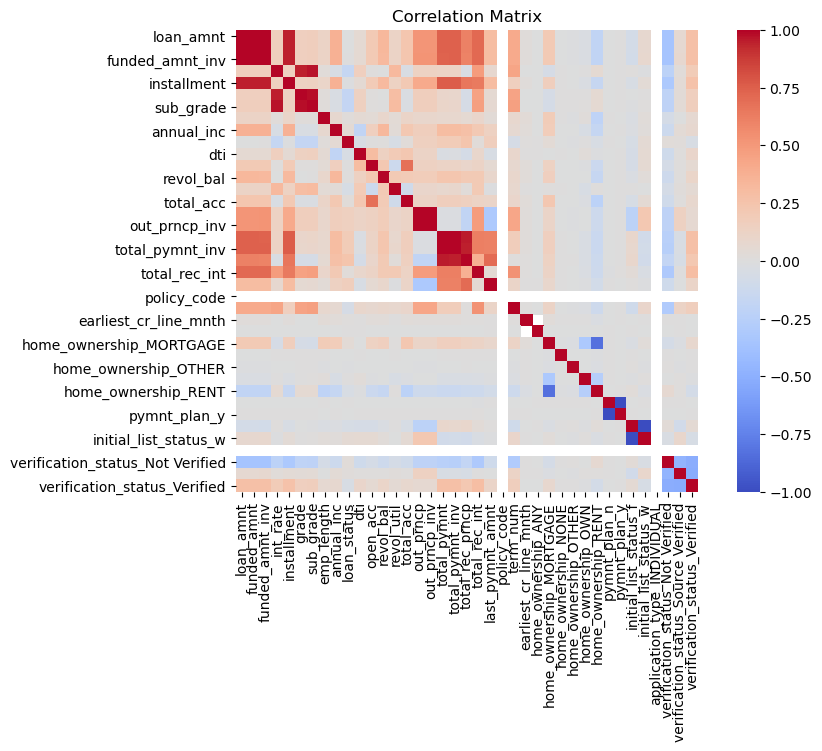

In [25]:
#correlation of variable

correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

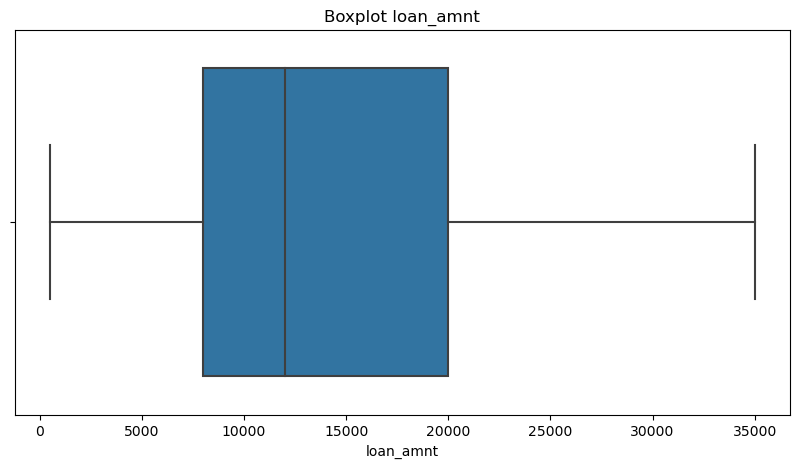

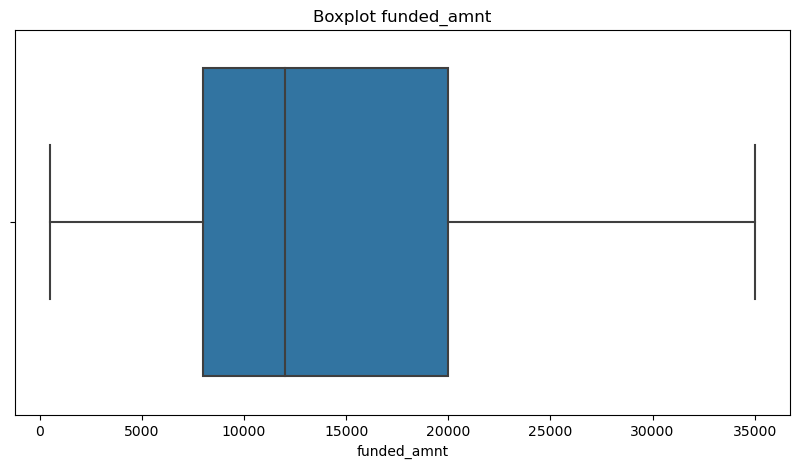

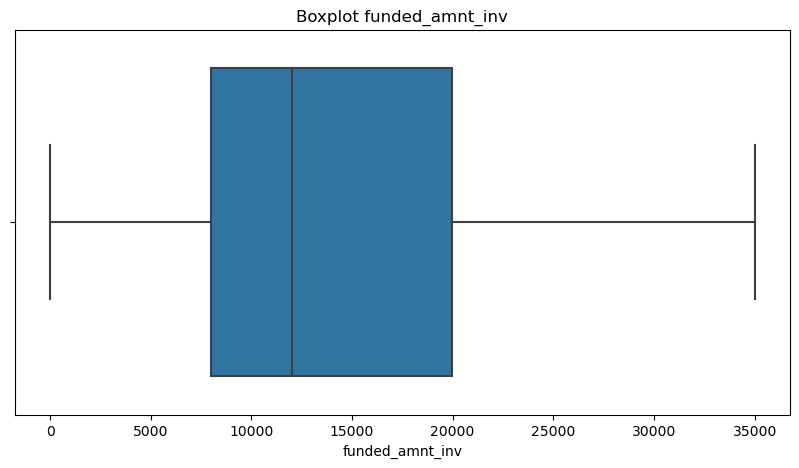

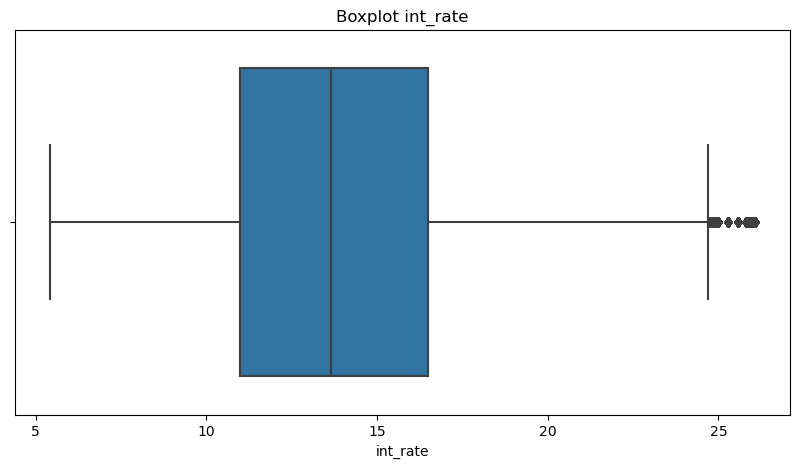

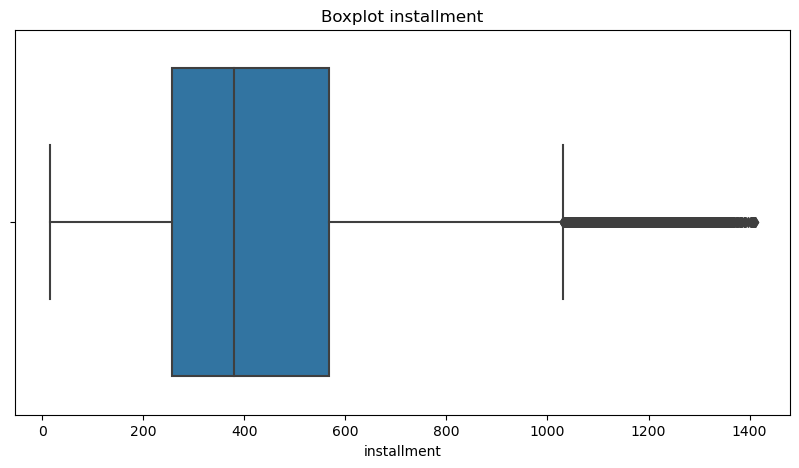

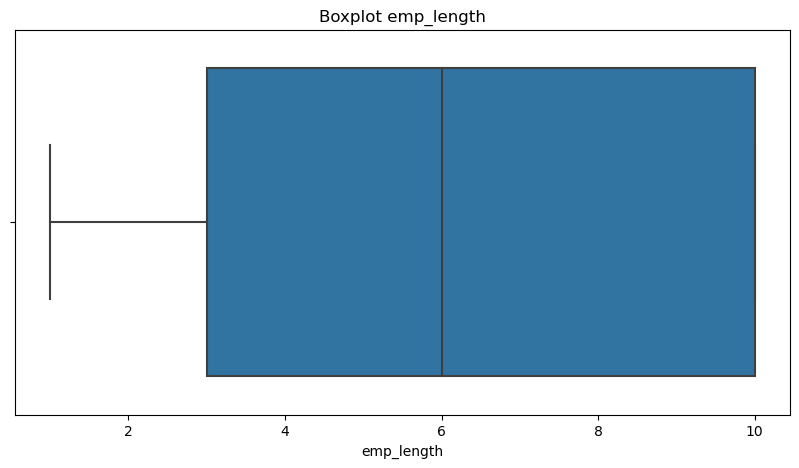

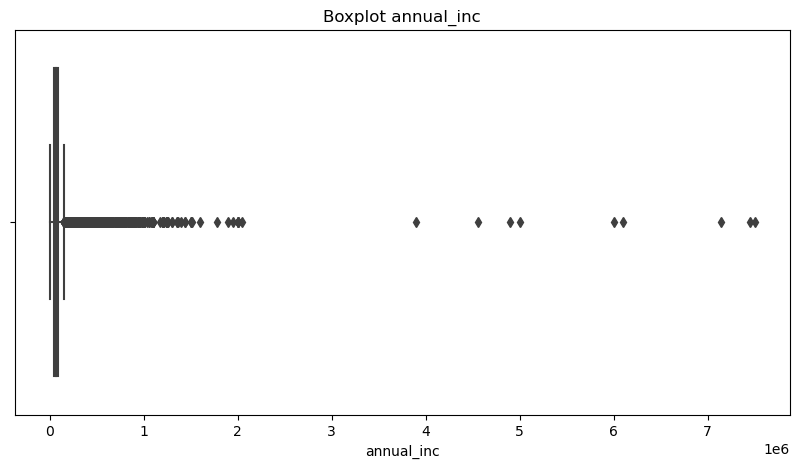

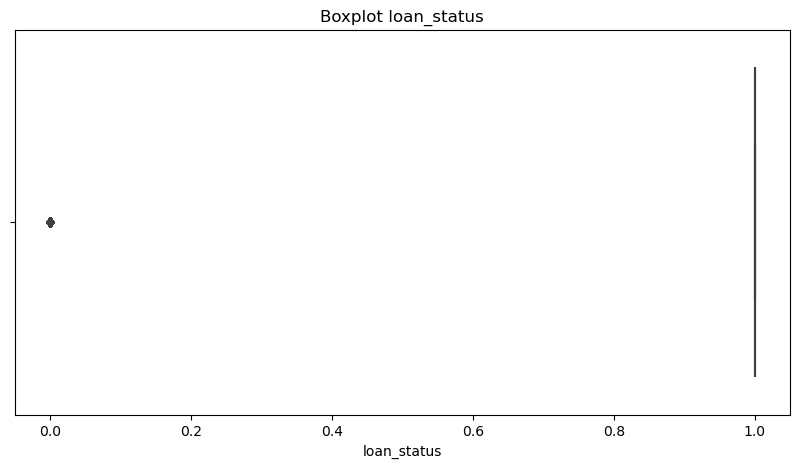

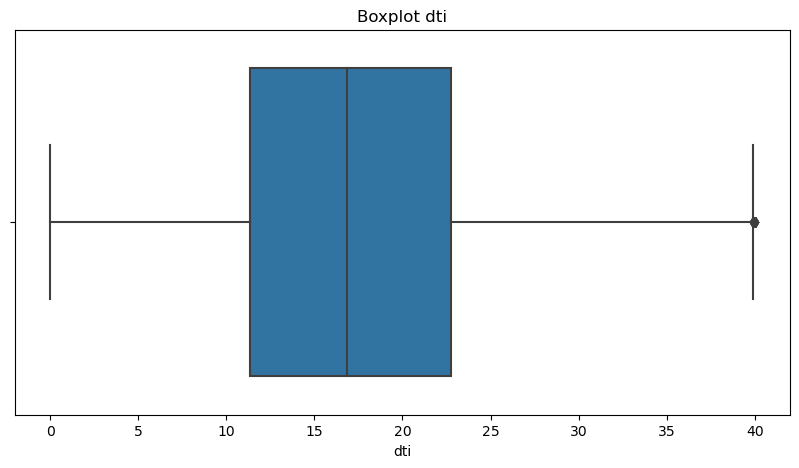

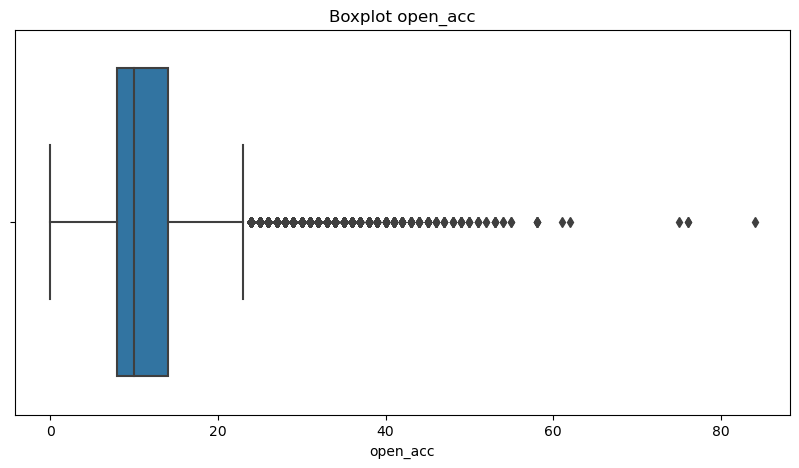

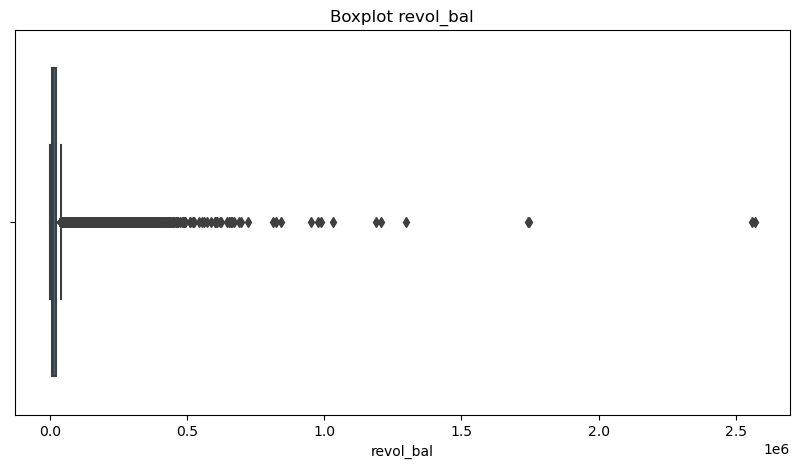

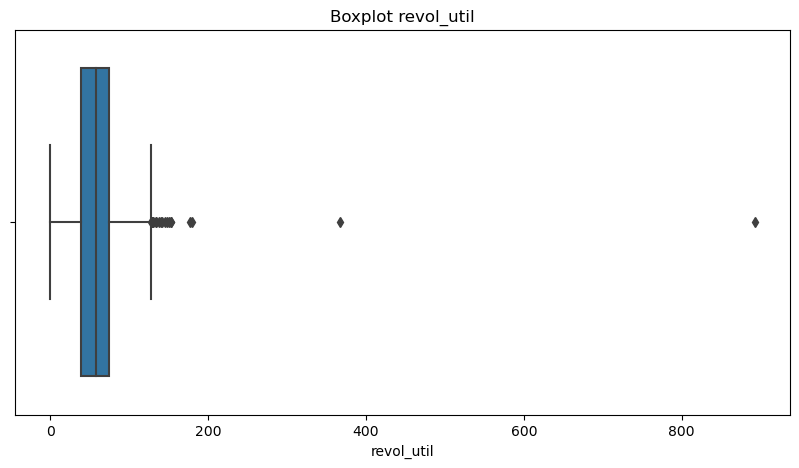

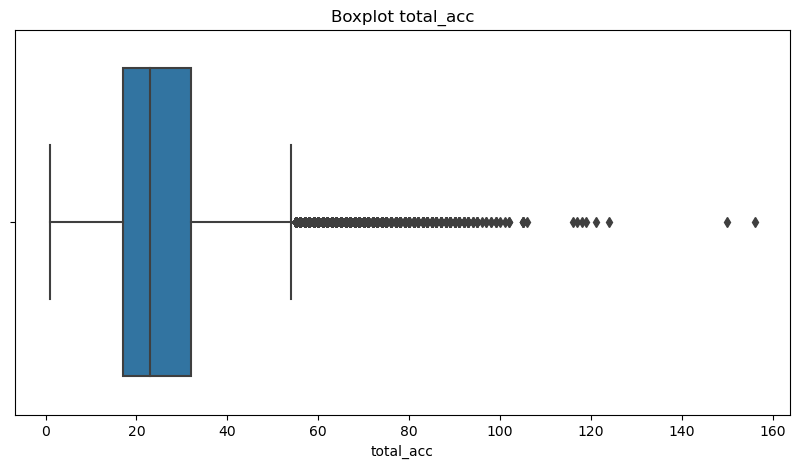

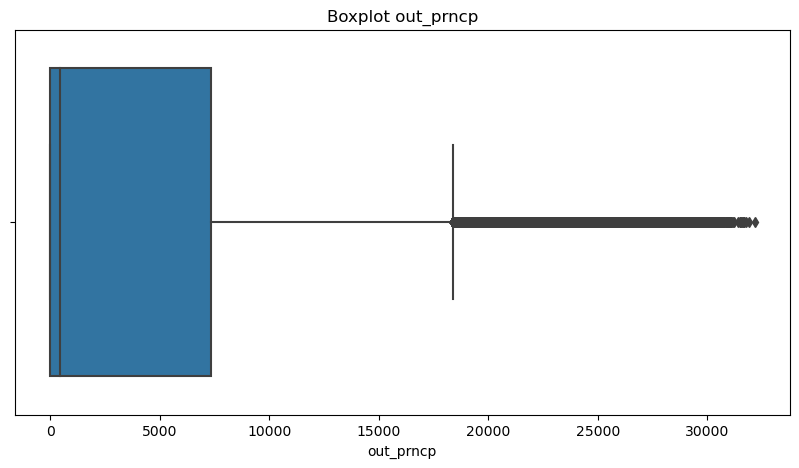

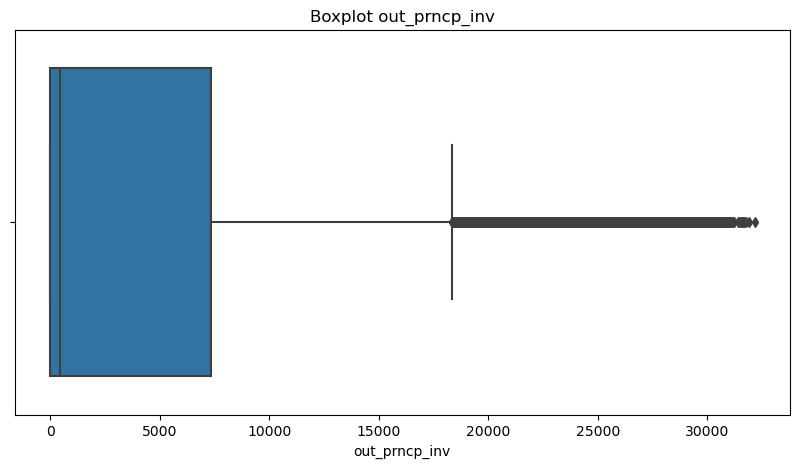

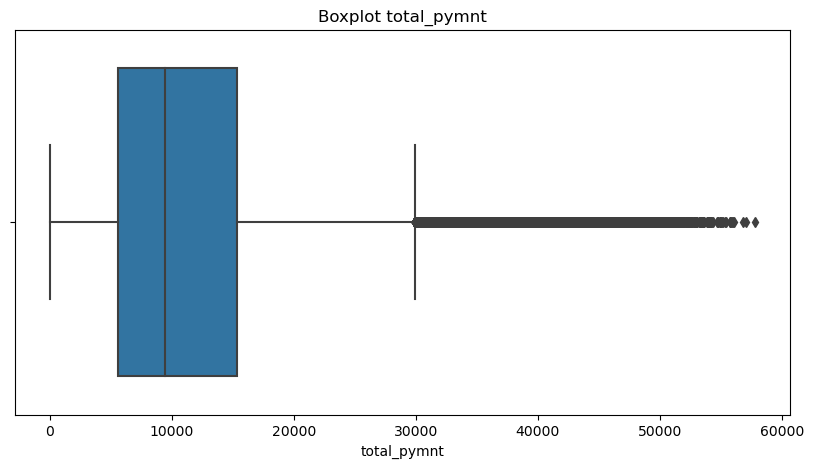

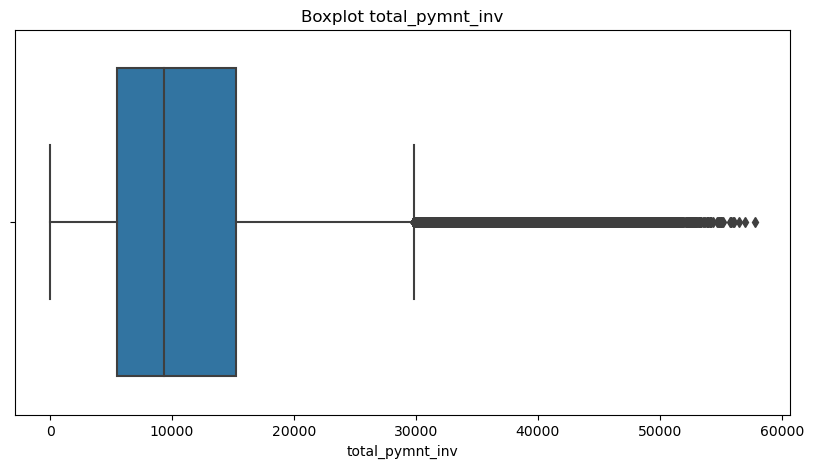

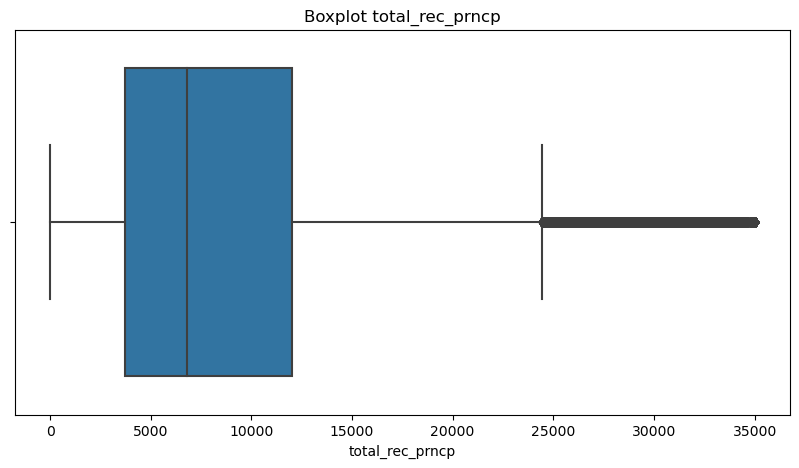

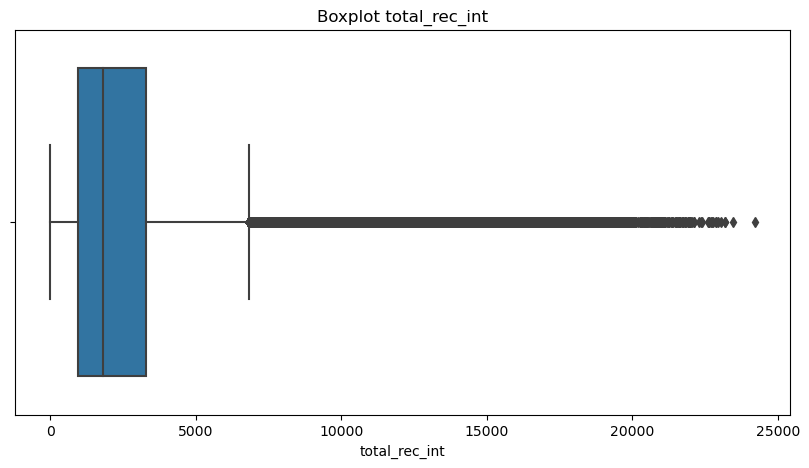

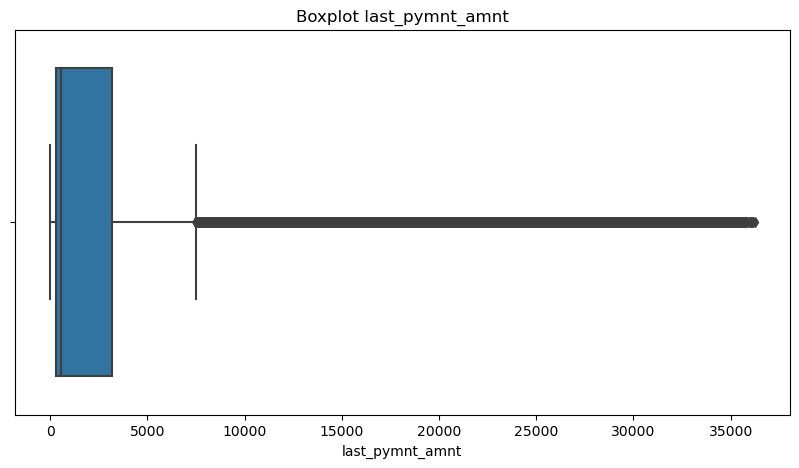

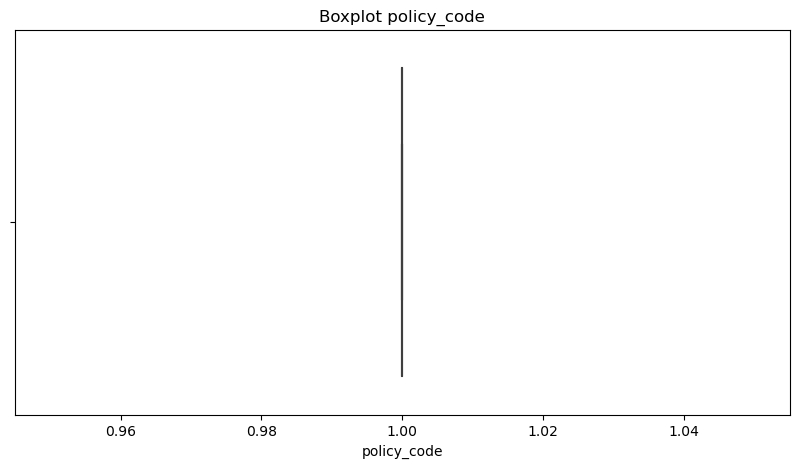

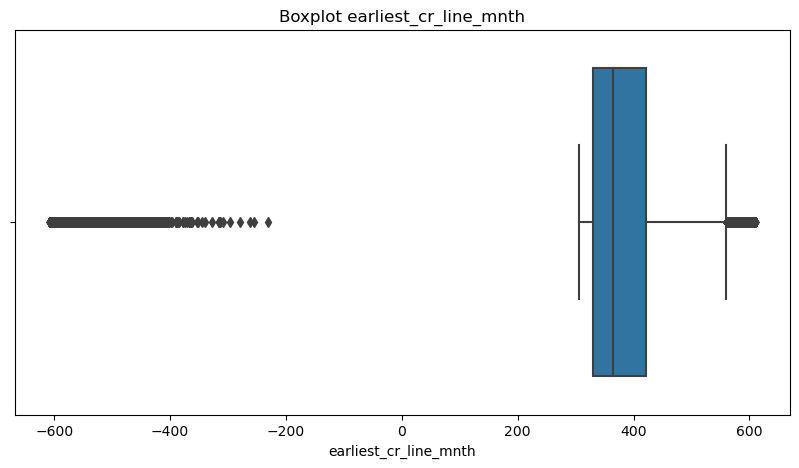

In [26]:
#cek outlier

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
    plt.show()

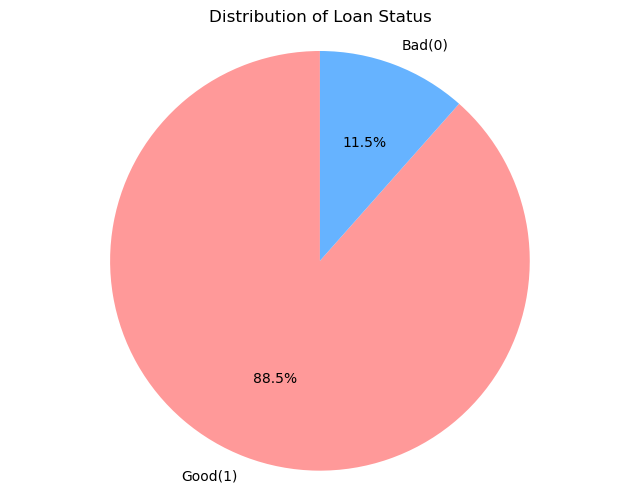

In [36]:
from scipy.stats.mstats import winsorize

for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.01,0.01]) #1% triming up and down

df['loan_status'].value_counts()

loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100
loan_status_counts.index = ['Good(1)','Bad(0)']
plt.figure(figsize=(8,6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Loan Status')
plt.axis('equal')
plt.show()

## Model and Evaluation

In [28]:
df.fillna(df.median(), inplace=True) #isi missing value jika masih ada

X = df.drop('loan_status', axis=1)
y = df['loan_status']  #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
}

#hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [100,200],
        'max_depth': [None, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3]
    }
}

#Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'Random Forest']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        param_grid={f'model__{k}': v for k, v in param_grids[model_name].items()}
    else:
        # no scaling for xgboost
        pipeline = model
        param_grid = param_grids[model_name]
        
    #grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1
    )
    if model_name == 'XGBoost':
        grid_search.fit(X_train, y_train)
    else:
        grid_search.fit(X_train_scaled, y_train)
        
    #best model
    best_model = grid_search.best_estimator_
    
    #predicition
    if model_name == 'XGBoost':
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        y_pred = best_model.predict(X_test)
    else:
        y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        y_pred = best_model.predict(X_test_scaled)
    
    #evaluation
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    #results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'ROC-AUC': roc_auc,
        'Classification Report': report
    }

for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"ROC-AUC: {metrics['ROC-AUC']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Model: Logistic Regression
Best Parameters: {'model__C': 10}
ROC-AUC: 0.9512958046183955
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     10754
           1       0.98      0.98      0.98     82422

    accuracy                           0.96     93176
   macro avg       0.89      0.89      0.89     93176
weighted avg       0.96      0.96      0.96     93176

Model: Random Forest
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
ROC-AUC: 0.9671107287319042
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     10754
           1       0.97      1.00      0.99     82422

    accuracy                           0.98     93176
   macro avg       0.99      0.90      0.94     93176
weighted avg       0.98 

In [32]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [33]:
import shap

In [34]:
xgb_model = XGBClassifier(
    learning_rate=0.3,
    max_depth=5,
    n_estimators=200,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

100%|===================| 93010/93176 [07:03<00:00]        

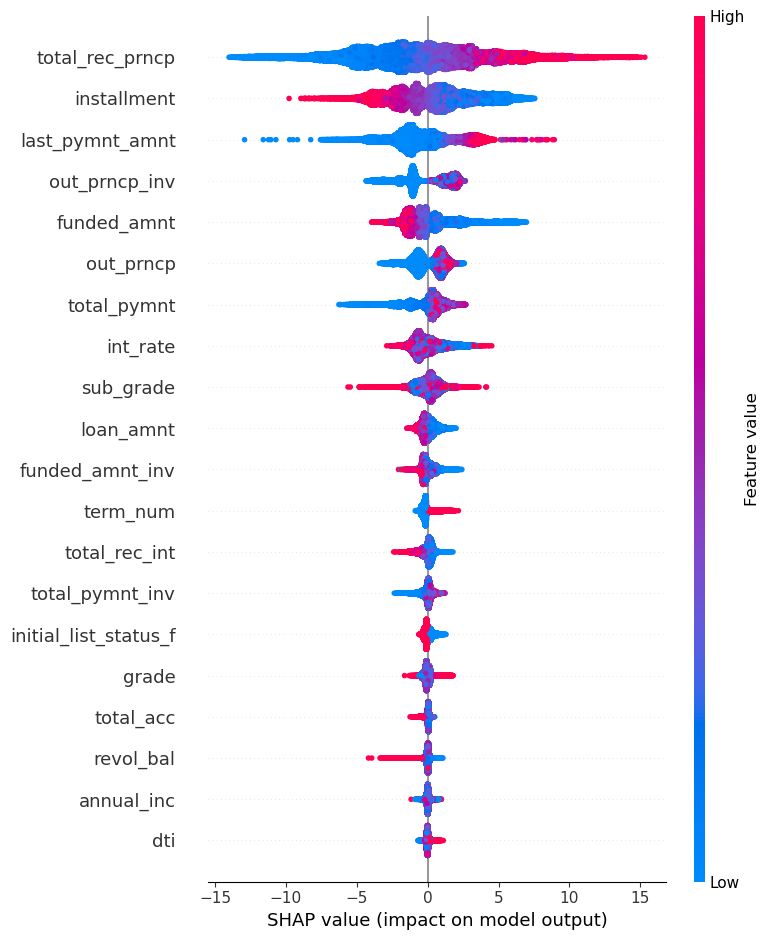

In [35]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)